In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
## upsampling + NN + multiclass ##

from imblearn.over_sampling import SMOTE
from collections import Counter
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import matthews_corrcoef
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
k = 5
gene_con = 105

# 1. anova_chi_test_n_500

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2 , f_classif,f_regression,mutual_info_classif,mutual_info_regression
from sklearn.svm import SVR

"""# Getting the genes from anova and chi2"""

#cancerXgene list


cancer_names = ["BLCA","BRCA","CESC","CHOL","COAD","ESCA","HNSC","KICH","KIRC","KIRP","LIHC","LUAD","LUSC","PAAD","PCPG","PRAD","READ","SARC","STAD","THCA","THYM","UCEC"]
normal_names = ["BLCA","BRCA","CESC","CHOL","COAD","ESCA","HNSC","KICH","KIRC","KIRP","LIHC","LUAD","LUSC","PAAD","PCPG","PRAD","READ","SARC","STAD","THCA","THYM","UCEC"]

#reading data and doing work
for index in range(len(cancer_names)):
  Cancer = pd.read_csv("/content/drive/MyDrive/package check/cancer/"+cancer_names[index]+".csv.gz", header=None, index_col=None)
  Normal = pd.read_csv("/content/drive/MyDrive/package check/normal/"+normal_names[index]+".norm.csv.gz", header=None, index_col=None) 

  #droping sample names needed man whats your problem?
  Cancer = Cancer.drop(Cancer.index[0])
  Cancer = Cancer.drop(columns=[0])
  Normal = Normal.drop(Normal.index[0])
  Normal = Normal.drop(columns=[0])

  # Cancer.to_csv(r'/content/drive/MyDrive/capstone_work_part_2/cancer_wo_h/'+
  #               cancer_names[index]+'.txt.bz2',compression="bz2", sep='\t',header=None,index=None,index_label=None)
  # Normal.to_csv(r'/content/drive/MyDrive/capstone_work_part_2/normal_wo_h/'+
  #               cancer_names[index]+'.txt.bz2',compression="bz2", sep='\t',header=None,index=None,index_label=None)

  #transpose
  Cancer_T = Cancer.T
  Normal_T = Normal.T

  #setting target
  Cancer_T["20501"] = 1.0
  Normal_T["20501"] = 0.0

  Cancer_T = Cancer_T.T
  Normal_T = Normal_T.T

  Cancer_T = Cancer_T.reset_index(drop=True)
  Normal_T = Normal_T.reset_index(drop=True)

  Cancer_T = Cancer_T.T
  Normal_T = Normal_T.T

  #print(Cancer_T)

  #dropping row
  Normal_T = Normal_T.drop(Normal_T.index[0])

  #concating
  X = pd.concat((Cancer_T,Normal_T),axis=0)
  # X = X.drop(columns = [0])
  # X = X.drop(X.index[0])
  x = X.iloc[:,:20501]
  y = X.iloc[:,20501]

  #print(x)
  #print(y)

  #selecting k value for anova
  k = 5

  #Anova test
  selector = SelectKBest(f_classif, k=k)
  selector.fit(x, y)
  cols_anova = selector.get_support(indices=True)
  np.save("/content/drive/MyDrive/capstone_work_part_2/std_npy/"+cancer_names[index],cols_anova)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,25

# 2. Data Process

## Step 1

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2 , f_classif,f_regression,mutual_info_classif,mutual_info_regression
from sklearn.svm import SVR

"""# Frequency Check"""

cancer_names = ["BLCA","BRCA","CESC","CHOL","COAD","ESCA","HNSC","KICH","KIRC","KIRP","LIHC","LUAD","LUSC","PAAD","PCPG","PRAD","READ","SARC","STAD","THCA","THYM","UCEC"]

data = pd.read_csv("/content/drive/MyDrive/package check/cancer/CHOL.csv.gz",header=None)
one_col = data.iloc[:,0:1]
one_col = one_col.drop(one_col.index[0])

gene_frequency = []
#reading data and doing work
for index in range(len(cancer_names)):
  DATA = np.load("/content/drive/MyDrive/capstone_work_part_2/std_npy/"+cancer_names[index]+".npy")
  # print(DATA)
  # print(DATA[0])
  #print(len(DATA))
  for i in range(len(DATA)):
    if (DATA[i] != 0):
      gene_frequency.append(one_col[0][DATA[i]])

np.save("/content/drive/MyDrive/capstone_work_part_2/std_npy/gene_frequency",gene_frequency)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45) have mixed types.Specify dtype option on import or set low_memory=False.



## Step 2

In [ ]:
import numpy as np
import json
import operator
import pandas as pd

gene_freq_count_list = np.load("/content/drive/MyDrive/capstone_work_part_2/std_npy/gene_frequency.npy")
unique_elements, counts_elements = np.unique(gene_freq_count_list, return_counts=True)
print("Unique genes:",len(unique_elements))

top_gene = {}

for i in range(len(unique_elements)):
	top_gene[unique_elements[i]] = counts_elements[i]
sorted_top_gene = dict(sorted(top_gene.items(), key=lambda item: item[1],reverse=True))
import csv
with open('/content/drive/MyDrive/capstone_work_part_2/std_npy/gene_frequency.csv', 'w') as f:
    for key in sorted_top_gene.keys():
        f.write("%s,%d\n"%(key,sorted_top_gene[key]))


np.save("/content/drive/MyDrive/capstone_work_part_2/data/genes_that_willbe_filtered",unique_elements)
data = pd.read_csv("/content/drive/MyDrive/capstone_work_part_2/std_npy/gene_frequency.csv",header=None)
counts = data.groupby(1).count()
counts.to_csv(r'/content/drive/MyDrive/capstone_work_part_2/std_npy/gene_frequency_across_cancer.csv',header=None,index=None,index_label=None)

Unique genes: 105


## Step 3


In [ ]:
## 1. select_gene_name_based_on_h1 ##

import numpy as np
import pandas as pd
import csv
import random

# importing the unique m genes name
unique_genes = np.load("/content/drive/MyDrive/capstone_work_part_2/data/genes_that_willbe_filtered.npy")

# reading and making a dictonary of counted numbers of genes based on their frequency
with open('/content/drive/MyDrive/capstone_work_part_2/std_npy/gene_frequency.csv', mode='r') as infile:
    reader = csv.reader(infile)
    gene_freq_dict = {rows[0]:rows[1] for rows in reader}

# print(type(unique_genes))
# print(unique_genes.shape)
# print(len(unique_genes))
# for gense in unique_genes:
# 	print(gense)

selected_genes = []
genes_with_freq_one = []
genes_with_freq_two = []
genes_with_freq_three = []
for gene in unique_genes:
  # if(gene_freq_dict[gene] == "1"):
  #   genes_with_freq_one.append(gene)
  # elif(gene_freq_dict[gene] == "2"):
  #   genes_with_freq_two.append(gene)
  # elif(gene_freq_dict[gene] == "3"):
  #   genes_with_freq_three.append(gene)
  # else:
  #   selected_genes.append(gene)
  selected_genes.append(gene)
  
#selected_genes = selected_genes[0:round(((len(selected_genes)/100) * 24.22))]
# selected_genes = selected_genes + genes_with_freq_three[0:round(((len(genes_with_freq_three)/100) * 25))] #55% taken
# selected_genes = selected_genes + genes_with_freq_two[0:round(((len(genes_with_freq_two)/100) * 15))] #45% taken
# selected_genes = selected_genes + genes_with_freq_one[0:round(((len(genes_with_freq_one)/100) * 5))] #55% taken

np.save("/content/drive/MyDrive/capstone_work_part_2/data/selected_genes_h2", selected_genes)

print(len(selected_genes))

gene_con = len(selected_genes)


105


## Step 4

In [ ]:
## 2. select_gene_need_to_drop_h1 ##

import numpy as np
import pandas as pd
import csv
import random

cancer_names = ["BLCA","BRCA","CESC","CHOL","COAD","ESCA","HNSC","KICH","KIRC","KIRP","LIHC","LUAD","LUSC","PAAD","PCPG","PRAD","READ","SARC","STAD","THCA","THYM","UCEC"]

selected_genes = np.load("/content/drive/MyDrive/capstone_work_part_2/data/selected_genes_h2.npy")
print(len(selected_genes))
data = pd.read_csv("/content/drive/MyDrive/package check/cancer/KICH.csv.gz",header=None)
header_gene_names =  data.iloc[:,0:1]
header_gene_names = header_gene_names.drop(header_gene_names.index[0])
header_gene_names.reset_index(drop=True, inplace=True)
# print(header_gene_names)
# print(header_gene_names.shape)

data_read = pd.read_csv(r"/content/drive/MyDrive/capstone_work_part_2/smoothed_cancer/KICHsmoothed.txt.bz2",header=None, delimiter = '\t')
# print(data_read)
#print(header_gene_names.shape)
#print(data_read.shape)

# adding gene names in a std cancer data

frame0 = [data_read,header_gene_names]
data_cancer_early = pd.concat(frame0, axis = 1)
data_cancer_early = data_cancer_early.T
data_cancer_early.reset_index(drop=True, inplace=True)


cols_exist = []
cols_to_del = []

#print(data_cancer_early)

# selecting the genes that we need from "selected genes"
for i in range(20501):
	for j in range(len(selected_genes)):
		if(data_cancer_early[i][91] == selected_genes[j]):
			cols_exist.append(i)

# selecting the genes that we need to drop from "cols_to_exist"
for i in range(20501):
	if(i not in cols_exist):
		cols_to_del.append(i)

print(len(cols_to_del))
# saving the genes that we need to drop
np.save("/content/drive/MyDrive/capstone_work_part_2/data/genes_to_del_500k_h2",cols_to_del)


105


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91) have mixed types.Specify dtype option on import or set low_memory=False.



20396


## Step 5

In [ ]:
## 3. save_data_after_gene_del_h2 ##

import numpy as np
import pandas as pd
import csv
import random
from sklearn.preprocessing import StandardScaler

cancer_names = ["BLCA","BRCA","CESC","CHOL","COAD","ESCA","HNSC","KICH","KIRC","KIRP","LIHC","LUAD","LUSC","PAAD","PCPG","PRAD","READ","SARC","STAD","THCA","THYM","UCEC"]

# loading the genes that need to delete and saving the data again after removing the deleted genes
selected_genes = np.load("/content/drive/MyDrive/capstone_work_part_2/data/genes_to_del_500k_h2.npy")
print(len(selected_genes))

for index in range(len(cancer_names)):
  Cancer = pd.read_csv("/content/drive/MyDrive/capstone_work_part_2/smoothed_cancer/"+
                       cancer_names[index]+"smoothed.txt.bz2",header=None, delimiter = '\t')
  Normal = pd.read_csv("/content/drive/MyDrive/capstone_work_part_2/smoothed_normal/"+
                       cancer_names[index]+"smoothed.txt.bz2",header=None, delimiter = '\t')

  Cancer = Cancer.T
  Normal = Normal.T

  cancer = Cancer.drop(columns = selected_genes)
  normal = Normal.drop(columns = selected_genes)

  print(cancer.shape)
  print(normal.shape)

  cancer = cancer.T
  normal = normal.T

  std_scaler_can = StandardScaler()
  std_scaler_norm = StandardScaler()

  cancer = pd.DataFrame(std_scaler_can.fit_transform(cancer), columns=cancer.columns)
  normal = pd.DataFrame(std_scaler_norm.fit_transform(normal), columns=normal.columns)

  cancer.to_csv(r'/content/drive/MyDrive/capstone_work_part_2/mahin/data_k_50/cancer/'+cancer_names[index]+'.txt.bz2',compression="bz2", sep='\t',header=None,index=None,index_label=None)
  normal.to_csv(r'/content/drive/MyDrive/capstone_work_part_2/mahin/data_k_50/normal/'+cancer_names[index]+'.txt.bz2',compression="bz2", sep='\t',header=None,index=None,index_label=None)



20396
(427, 105)
(19, 105)
(1212, 105)
(112, 105)
(309, 105)
(3, 105)
(45, 105)
(9, 105)
(328, 105)
(26, 105)
(196, 105)
(11, 105)
(566, 105)
(43, 105)
(91, 105)
(25, 105)
(606, 105)
(72, 105)
(323, 105)
(32, 105)
(423, 105)
(50, 105)
(576, 105)
(58, 105)
(552, 105)
(51, 105)
(183, 105)
(4, 105)
(187, 105)
(3, 105)
(550, 105)
(52, 105)
(105, 105)
(6, 105)
(265, 105)
(2, 105)
(450, 105)
(32, 105)
(568, 105)
(59, 105)
(122, 105)
(2, 105)
(201, 105)
(7, 105)


## test train split for cancer (manually)

In [ ]:
#for cancer

import numpy as np
import pandas as pd
import csv
import random
from sklearn.preprocessing import StandardScaler

cancer_names = ["BLCA","BRCA","CESC","CHOL","COAD","ESCA","HNSC","KICH","KIRC","KIRP","LIHC","LUAD","LUSC","PAAD","PCPG","PRAD","READ","SARC","STAD","THCA","THYM","UCEC"]
#len(cancer_names)
for index in range(len(cancer_names)):
  Cancer = pd.read_csv("/content/drive/MyDrive/capstone_work_part_2/mahin/data_k_50/cancer/"+cancer_names[index]+".txt.bz2",header=None, delimiter = '\t')
  print(cancer_names[index])
  print(len(Cancer.columns))
  val_train = round((len(Cancer.columns) * 75) / 100) 
  val_test = len(Cancer.columns) - val_train
  print(val_train)
  print(val_test)
  print()
  i = 0

  cols_for_test = []
  cols_for_train = []

  while i < val_test:
    x = random.randint(0,(len(Cancer.columns)-1))
    if x not in cols_for_test:
      cols_for_test.append(x)
      i += 1
  i = 0
  while i < val_train:
    x = random.randint(0,(len(Cancer.columns)-1))
    if x not in cols_for_test:
      if x not in cols_for_train:
        cols_for_train.append(x)
        i += 1

  test_cancer = Cancer.drop(columns = cols_for_train)
  train_cancer = Cancer.drop(columns = cols_for_test)

  test_cancer.to_csv(r'/content/drive/MyDrive/capstone_work_part_2/test_data/cancer/'+cancer_names[index]+'.txt.bz2',compression="bz2", sep='\t',header=None,index=None,index_label=None)
  train_cancer.to_csv(r'/content/drive/MyDrive/capstone_work_part_2/pre_upsample_train_data/cancer/'+cancer_names[index]+'.txt.bz2',compression="bz2", sep='\t',header=None,index=None,index_label=None)


BLCA
427
320
107

BRCA
1212
909
303

CESC
309
232
77

CHOL
45
34
11

COAD
328
246
82

ESCA
196
147
49

HNSC
566
424
142

KICH
91
68
23

KIRC
606
454
152

KIRP
323
242
81

LIHC
423
317
106

LUAD
576
432
144

LUSC
552
414
138

PAAD
183
137
46

PCPG
187
140
47

PRAD
550
412
138

READ
105
79
26

SARC
265
199
66

STAD
450
338
112

THCA
568
426
142

THYM
122
92
30

UCEC
201
151
50



## test train split for normal (manually)

In [ ]:
#for normal

import numpy as np
import pandas as pd
import csv
import random
from sklearn.preprocessing import StandardScaler

cancer_names = ["BLCA","BRCA","CESC","CHOL","COAD","ESCA","HNSC","KICH",
                "KIRC","KIRP","LIHC","LUAD","LUSC","PAAD","PCPG","PRAD",
                "READ","SARC","STAD","THCA","THYM","UCEC"]
#len(cancer_names)
for index in range(len(cancer_names)):
  Cancer = pd.read_csv("/content/drive/MyDrive/capstone_work_part_2/mahin/data_k_50/normal/"+
                       cancer_names[index]+".txt.bz2",header=None, delimiter = '\t')
  print(cancer_names[index])
  print(len(Cancer.columns))
  if(len(Cancer.columns) != 2):
    val_train = round((len(Cancer.columns) * 75) / 100) 
    val_test = len(Cancer.columns) - val_train
    print(val_train)
    print(val_test)
    print()
    i = 0

    cols_for_test = []
    cols_for_train = []

    while i < val_test:
      x = random.randint(0,(len(Cancer.columns)-1))
      if x not in cols_for_test:
        cols_for_test.append(x)
        i += 1
    i = 0
    while i < val_train:
      x = random.randint(0,(len(Cancer.columns)-1))
      if x not in cols_for_test:
        if x not in cols_for_train:
          cols_for_train.append(x)
          i += 1

    test_cancer = Cancer.drop(columns = cols_for_train)
    train_cancer = Cancer.drop(columns = cols_for_test)

    test_cancer.to_csv(r'/content/drive/MyDrive/capstone_work_part_2/test_data/normal/'+
                      cancer_names[index]+'.txt.bz2',compression="bz2", sep='\t',header=None,index=None,index_label=None)
    train_cancer.to_csv(r'/content/drive/MyDrive/capstone_work_part_2/pre_upsample_train_data/normal/'+
                        cancer_names[index]+'.txt.bz2',compression="bz2", sep='\t',header=None,index=None,index_label=None)

  else:
    val_train = 2
    val_test = 1
    print(val_train)
    print(val_test)
    print()
    cols_for_train = [1]
    test_cancer = Cancer.drop(columns = cols_for_train)
    train_cancer = Cancer

    test_cancer.to_csv(r'/content/drive/MyDrive/capstone_work_part_2/test_data/normal/'+
                  cancer_names[index]+'.txt.bz2',compression="bz2", sep='\t',header=None,index=None,index_label=None)
    train_cancer.to_csv(r'/content/drive/MyDrive/capstone_work_part_2/pre_upsample_train_data/normal/'+
                        cancer_names[index]+'.txt.bz2',compression="bz2", sep='\t',header=None,index=None,index_label=None)



BLCA
19
14
5

BRCA
112
84
28

CESC
3
2
1

CHOL
9
7
2

COAD
26
20
6

ESCA
11
8
3

HNSC
43
32
11

KICH
25
19
6

KIRC
72
54
18

KIRP
32
24
8

LIHC
50
38
12

LUAD
58
44
14

LUSC
51
38
13

PAAD
4
3
1

PCPG
3
2
1

PRAD
52
39
13

READ
6
4
2

SARC
2
2
1

STAD
32
24
8

THCA
59
44
15

THYM
2
2
1

UCEC
7
5
2



## upsampling train data set in 3:1




In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter

cancer_names = ["BLCA","BRCA","CESC","CHOL","COAD","ESCA","HNSC","KICH",
                "KIRC","KIRP","LIHC","LUAD","LUSC","PAAD","PCPG","PRAD",
                "READ","SARC","STAD","THCA","THYM","UCEC"]

#len(cancer_names)

for index in range(len(cancer_names)):
  Cancer = pd.read_csv("/content/drive/MyDrive/capstone_work_part_2/pre_upsample_train_data/cancer/"+
                       cancer_names[index]+".txt.bz2",header=None, delimiter = '\t')
  Normal = pd.read_csv("/content/drive/MyDrive/capstone_work_part_2/pre_upsample_train_data/normal/"+
                       cancer_names[index]+".txt.bz2",header=None, delimiter = '\t')

  # print(Cancer)
  # print(Normal)
  can_sample = len(Cancer.columns)
  norm_sample = len(Normal.columns)

  # print(can_sample)
  # print(norm_sample)
  
  Cancer = Cancer.T
  Normal = Normal.T

  if( norm_sample <= round(can_sample/3) ):
    ## adding target in the last col
    Cancer[str(gene_con)] = 1
    Normal[str(gene_con)] = 0
    
    #print(Cancer)

    frame = [Cancer,Normal]
    Data = pd.concat(frame,axis=0)

    #print(Data)

    x = Data.iloc[:,:gene_con]
    y = Data.iloc[:,gene_con]
    #print(x)
    #print(y)

    # summarize class distribution
    counter = Counter(y)
    print(counter)
    # transform the dataset
    oversample = SMOTE(k_neighbors=1, sampling_strategy=0.3333)
    X, y = oversample.fit_resample(x, y)
    # summarize the new class distribution
    counter = Counter(y)
    print(counter)
    #[1:,1:],index=data[1:,0],columns=data[0,1:]
    X = pd.DataFrame(data=X)
    y = pd.DataFrame(data=y)

    data = pd.concat([X,y], axis = 1)
    data = data.T
    data = data.reset_index(drop=True)
    #print(data)
    #print(len(data.columns))
    can = []
    norm = []
    for x in range(len(data.columns)):
      if(data[x][gene_con]==0):
        norm.append(x)
      elif(data[x][gene_con]==1):
        can.append(x)

    drops_for_can = []

    for x in range(len(data.columns)):
      if(x not in can):
        drops_for_can.append(x)
    Cancer = data.drop(columns=drops_for_can)

    drops_for_norm = []

    for x in range(len(data.columns)):
      if(x not in norm):
        drops_for_norm.append(x)
    Normal = data.drop(columns=drops_for_norm)

    Cancer = Cancer.drop(Cancer.index[gene_con])
    Normal = Normal.drop(Normal.index[gene_con])

    # Cancer = Cancer.T
    # Normal = Normal.T

    #print(Cancer)

    Cancer.to_csv(r'/content/drive/MyDrive/capstone_work_part_2/train_data/cancer/'+
                  cancer_names[index]+'.txt.bz2',compression="bz2", sep='\t',header=None,index=None,index_label=None)
    Normal.to_csv(r'/content/drive/MyDrive/capstone_work_part_2/train_data/normal/'+
                  cancer_names[index]+'.txt.bz2',compression="bz2", sep='\t',header=None,index=None,index_label=None)


Counter({1: 320, 0: 14})
Counter({1: 320, 0: 106})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Counter({1: 909, 0: 84})
Counter({1: 909, 0: 302})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Counter({1: 232, 0: 2})
Counter({1: 232, 0: 77})
Counter({1: 34, 0: 7})
Counter({1: 34, 0: 11})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Counter({1: 246, 0: 20})
Counter({1: 246, 0: 81})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Counter({1: 147, 0: 8})
Counter({1: 147, 0: 48})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Counter({1: 424, 0: 32})
Counter({1: 424, 0: 141})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Counter({1: 68, 0: 19})
Counter({1: 68, 0: 22})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Counter({1: 454, 0: 54})
Counter({1: 454, 0: 151})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Counter({1: 242, 0: 24})
Counter({1: 242, 0: 80})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Counter({1: 317, 0: 38})
Counter({1: 317, 0: 105})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Counter({1: 432, 0: 44})
Counter({1: 432, 0: 143})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Counter({1: 414, 0: 38})
Counter({1: 414, 0: 137})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Counter({1: 137, 0: 3})
Counter({1: 137, 0: 45})
Counter({1: 140, 0: 2})
Counter({1: 140, 0: 46})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Counter({1: 412, 0: 39})
Counter({1: 412, 0: 137})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Counter({1: 79, 0: 4})
Counter({1: 79, 0: 26})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Counter({1: 199, 0: 2})
Counter({1: 199, 0: 66})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Counter({1: 338, 0: 24})
Counter({1: 338, 0: 112})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Counter({1: 426, 0: 44})
Counter({1: 426, 0: 141})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Counter({1: 92, 0: 2})
Counter({1: 92, 0: 30})
Counter({1: 151, 0: 5})
Counter({1: 151, 0: 50})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



## merging bin train data

In [ ]:
## 4. merging_data_h1 ##

import numpy as np
import pandas as pd

cancer_names = ["BLCA","BRCA","CESC","CHOL","COAD","ESCA","HNSC",
                "KICH","KIRC","KIRP","LIHC","LUAD","LUSC","PAAD",
                "PCPG","PRAD","READ","SARC","STAD","THCA","THYM",
                "UCEC"]

#reading data and doing work
cresult=pd.DataFrame()
nresult=pd.DataFrame()
for index in range(len(cancer_names)):
  Cancer = pd.read_csv("/content/drive/MyDrive/capstone_work_part_2/train_data/cancer/"+
                       cancer_names[index]+".txt.bz2",header=None, delimiter = "\t")
  Normal = pd.read_csv("/content/drive/MyDrive/capstone_work_part_2/train_data/normal/"+
                       cancer_names[index]+".txt.bz2",header=None, delimiter = "\t")
  
  Cancer= Cancer.T
  Normal=Normal.T
  
  frames1 = [Cancer, cresult]
  cresult = pd.concat(frames1)
  
  frames2 = [Normal, nresult]
  nresult = pd.concat(frames2)
  
  print(cresult.shape)
  print(nresult.shape)
  
# merging all the cancer and normal data together and saving them  
cresult.to_csv(r'/content/drive/MyDrive/capstone_work_part_2/train_data/bin_Cancer_'+str(k)+'.txt.bz2',
               compression="bz2", sep='\t',header=None,index=None,index_label=None)

nresult.to_csv(r'/content/drive/MyDrive/capstone_work_part_2/train_data/bin_Normal_'+str(k)+'.txt.bz2',
               compression="bz2", sep='\t',header=None,index=None,index_label=None)
  
  


(320, 105)
(106, 105)
(1229, 105)
(408, 105)
(1461, 105)
(485, 105)
(1495, 105)
(496, 105)
(1741, 105)
(577, 105)
(1888, 105)
(625, 105)
(2312, 105)
(766, 105)
(2380, 105)
(788, 105)
(2834, 105)
(939, 105)
(3076, 105)
(1019, 105)
(3393, 105)
(1124, 105)
(3825, 105)
(1267, 105)
(4239, 105)
(1404, 105)
(4376, 105)
(1449, 105)
(4516, 105)
(1495, 105)
(4928, 105)
(1632, 105)
(5007, 105)
(1658, 105)
(5206, 105)
(1724, 105)
(5544, 105)
(1836, 105)
(5970, 105)
(1977, 105)
(6062, 105)
(2007, 105)
(6213, 105)
(2057, 105)


## merging bin test data

In [ ]:
## 4. merging_data_h1 ##

import numpy as np
import pandas as pd

cancer_names = ["BLCA","BRCA","CESC","CHOL","COAD","ESCA","HNSC",
                "KICH","KIRC","KIRP","LIHC","LUAD","LUSC","PAAD",
                "PCPG","PRAD","READ","SARC","STAD","THCA","THYM",
                "UCEC"]

#reading data and doing work
cresult=pd.DataFrame()
nresult=pd.DataFrame()
for index in range(len(cancer_names)):
  Cancer = pd.read_csv("/content/drive/MyDrive/capstone_work_part_2/test_data/cancer/"+
                       cancer_names[index]+".txt.bz2",header=None, delimiter = "\t")
  Normal = pd.read_csv("/content/drive/MyDrive/capstone_work_part_2/test_data/normal/"+
                       cancer_names[index]+".txt.bz2",header=None, delimiter = "\t")
  
  Cancer= Cancer.T
  Normal=Normal.T
  
  frames1 = [Cancer, cresult]
  cresult = pd.concat(frames1)
  
  frames2 = [Normal, nresult]
  nresult = pd.concat(frames2)
  
  print(cresult.shape)
  print(nresult.shape)
  
# merging all the cancer and normal data together and saving them  
cresult.to_csv(r'/content/drive/MyDrive/capstone_work_part_2/test_data/bin_Cancer_'+str(k)+'.txt.bz2',
               compression="bz2", sep='\t',header=None,index=None,index_label=None)

nresult.to_csv(r'/content/drive/MyDrive/capstone_work_part_2/test_data/bin_Normal_'+str(k)+'.txt.bz2',
               compression="bz2", sep='\t',header=None,index=None,index_label=None)
  
  


(107, 105)
(5, 105)
(410, 105)
(33, 105)
(487, 105)
(34, 105)
(498, 105)
(36, 105)
(580, 105)
(42, 105)
(629, 105)
(45, 105)
(771, 105)
(56, 105)
(794, 105)
(62, 105)
(946, 105)
(80, 105)
(1027, 105)
(88, 105)
(1133, 105)
(100, 105)
(1277, 105)
(114, 105)
(1415, 105)
(127, 105)
(1461, 105)
(128, 105)
(1508, 105)
(129, 105)
(1646, 105)
(142, 105)
(1672, 105)
(144, 105)
(1738, 105)
(145, 105)
(1850, 105)
(153, 105)
(1992, 105)
(168, 105)
(2022, 105)
(169, 105)
(2072, 105)
(171, 105)


# tcga pan data merging

## train


In [ ]:
## HYPOTHESIS 1 ##

import numpy as np
import pandas as pd
from collections import Counter
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import matthews_corrcoef
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

cancer_names = ["BLCA","BRCA","CESC","CHOL","COAD","ESCA","HNSC",
                "KICH","KIRC","KIRP","LIHC","LUAD","LUSC","PAAD",
                "PCPG","PRAD","READ","SARC","STAD","THCA","THYM",
                "UCEC"]


#reading data and doing work
cresult=pd.DataFrame()
nresult=pd.DataFrame()
print(len(cancer_names))
for index in range(len(cancer_names)):
  Cancer = pd.read_csv("/content/drive/MyDrive/capstone_work_part_2/train_data/cancer/"+
                       cancer_names[index]+".txt.bz2",header=None, delimiter = "\t")
  Normal = pd.read_csv("/content/drive/MyDrive/capstone_work_part_2/train_data/normal/"+
                       cancer_names[index]+".txt.bz2",header=None, delimiter = "\t")

  Cancer = Cancer.T
  Normal = Normal.T
  #print(Cancer)
  #print(Normal)

  Cancer['target'] = cancer_names[index]
  Normal['target'] = "normal"

  frames1 = [Cancer, cresult]
  cresult = pd.concat(frames1)
  
  frames2 = [Normal, nresult]
  nresult = pd.concat(frames2)
  
  print(cresult.shape)
  print(nresult.shape)
  

# merging all the cancer and normal data together separately and saving them  
cresult.to_csv(r'/content/drive/MyDrive/capstone_work_part_2/train_data/pan_Cancer_'+str(k)+'.txt.bz2',
               compression="bz2", sep='\t',header=None,index=None,index_label=None)

nresult.to_csv(r'/content/drive/MyDrive/capstone_work_part_2/train_data/pan_Normal_'+str(k)+'.txt.bz2',
               compression="bz2", sep='\t',header=None,index=None,index_label=None)


22
(320, 106)
(106, 106)
(1229, 106)
(408, 106)
(1461, 106)
(485, 106)
(1495, 106)
(496, 106)
(1741, 106)
(577, 106)
(1888, 106)
(625, 106)
(2312, 106)
(766, 106)
(2380, 106)
(788, 106)
(2834, 106)
(939, 106)
(3076, 106)
(1019, 106)
(3393, 106)
(1124, 106)
(3825, 106)
(1267, 106)
(4239, 106)
(1404, 106)
(4376, 106)
(1449, 106)
(4516, 106)
(1495, 106)
(4928, 106)
(1632, 106)
(5007, 106)
(1658, 106)
(5206, 106)
(1724, 106)
(5544, 106)
(1836, 106)
(5970, 106)
(1977, 106)
(6062, 106)
(2007, 106)
(6213, 106)
(2057, 106)


## test

In [ ]:
## HYPOTHESIS 1 ##

import numpy as np
import pandas as pd
from collections import Counter
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import matthews_corrcoef
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

cancer_names = ["BLCA","BRCA","CESC","CHOL","COAD","ESCA","HNSC",
                "KICH","KIRC","KIRP","LIHC","LUAD","LUSC","PAAD",
                "PCPG","PRAD","READ","SARC","STAD","THCA","THYM",
                "UCEC"]


#reading data and doing work
cresult=pd.DataFrame()
nresult=pd.DataFrame()
print(len(cancer_names))
for index in range(len(cancer_names)):
  Cancer = pd.read_csv("/content/drive/MyDrive/capstone_work_part_2/test_data/cancer/"+
                       cancer_names[index]+".txt.bz2",header=None, delimiter = "\t")
  Normal = pd.read_csv("/content/drive/MyDrive/capstone_work_part_2/test_data/normal/"+
                       cancer_names[index]+".txt.bz2",header=None, delimiter = "\t")

  Cancer = Cancer.T
  Normal = Normal.T
  #print(Cancer)
  #print(Normal)

  Cancer['target'] = cancer_names[index]
  Normal['target'] = "normal"

  frames1 = [Cancer, cresult]
  cresult = pd.concat(frames1)
  
  frames2 = [Normal, nresult]
  nresult = pd.concat(frames2)
  
  print(cresult.shape)
  print(nresult.shape)
  

# merging all the cancer and normal data together separately and saving them  
cresult.to_csv(r'/content/drive/MyDrive/capstone_work_part_2/test_data/pan_Cancer_'+str(k)+'.txt.bz2',
               compression="bz2", sep='\t',header=None,index=None,index_label=None)

nresult.to_csv(r'/content/drive/MyDrive/capstone_work_part_2/test_data/pan_Normal_'+str(k)+'.txt.bz2',
               compression="bz2", sep='\t',header=None,index=None,index_label=None)


22
(107, 106)
(5, 106)
(410, 106)
(33, 106)
(487, 106)
(34, 106)
(498, 106)
(36, 106)
(580, 106)
(42, 106)
(629, 106)
(45, 106)
(771, 106)
(56, 106)
(794, 106)
(62, 106)
(946, 106)
(80, 106)
(1027, 106)
(88, 106)
(1133, 106)
(100, 106)
(1277, 106)
(114, 106)
(1415, 106)
(127, 106)
(1461, 106)
(128, 106)
(1508, 106)
(129, 106)
(1646, 106)
(142, 106)
(1672, 106)
(144, 106)
(1738, 106)
(145, 106)
(1850, 106)
(153, 106)
(1992, 106)
(168, 106)
(2022, 106)
(169, 106)
(2072, 106)
(171, 106)


# TSNE

## Load Data test


In [ ]:
#test load
Cancer = pd.read_csv(
    "/content/drive/MyDrive/capstone_work_part_2/test_data/pan_Cancer_"+str(k)+".txt.bz2",
    header=None, delimiter = "\t")
Normal = pd.read_csv(
    "/content/drive/MyDrive/capstone_work_part_2/test_data/pan_Normal_"+str(k)+".txt.bz2",
    header=None, delimiter = "\t")
Normal = Normal.drop(Normal.index[0])
frame = [Cancer,Normal]
Data = pd.concat(frame,axis=0)
Data = Data.drop(Data.index[0])
#print(Data)
X_train = Data.iloc[:,:gene_con]
y_train = Data.iloc[:,gene_con]

print(X_train.shape)
print(y_train.shape)



(2241, 105)
(2241,)


In [ ]:
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)
print(type(encoded_Y))

<class 'numpy.ndarray'>


In [ ]:
X_train['y'] = encoded_Y
np.random.seed(42)
rndperm = np.random.permutation(Data.shape[0])

In [ ]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_train)
X_train['pca-one'] = pca_result[:,0]
X_train['pca-two'] = pca_result[:,1] 
X_train['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.45470819 0.13503865 0.09323896]


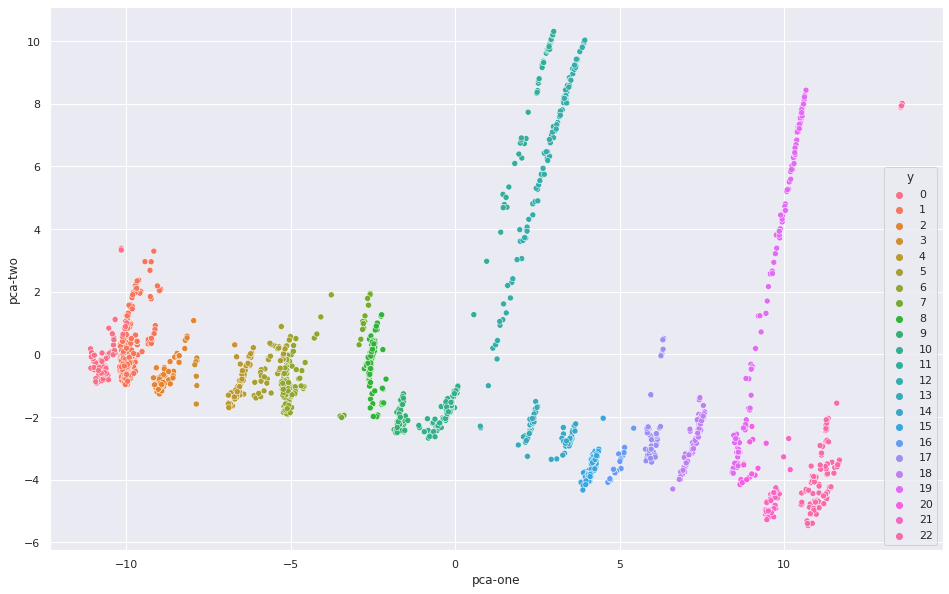

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    #palette=sns.color_palette('bright', X_train.y.unique().shape[0]),
    # palette = sns.color_palette('bright', 23),
    palette = sns.color_palette('husl', X_train.y.unique().shape[0]),
    data=X_train,
    legend="full",
    alpha=1
)

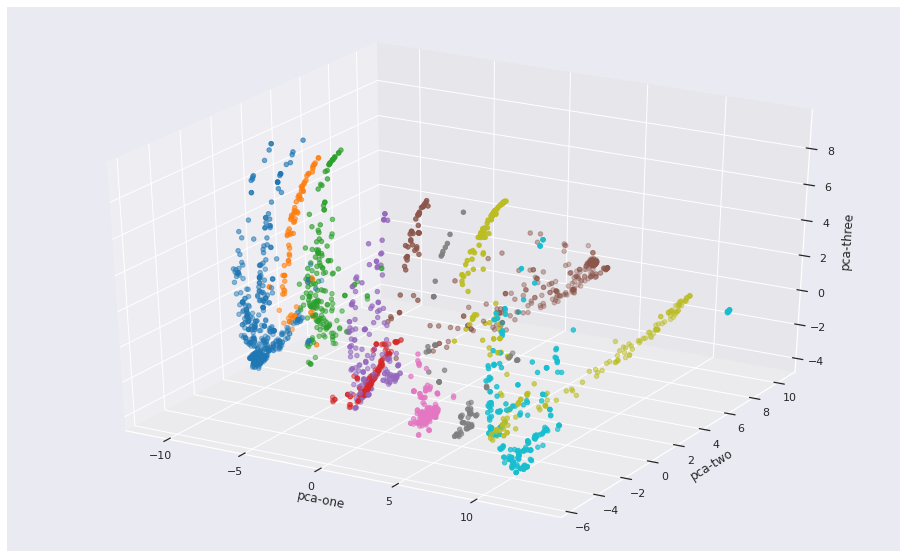

In [ ]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=X_train.iloc[rndperm,:]["pca-one"], 
    ys=X_train.iloc[rndperm,:]["pca-two"], 
    zs=X_train.iloc[rndperm,:]["pca-three"], 
    c=X_train.iloc[rndperm,:]["y"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [ ]:
import plotly.express as px
fig = px.scatter_3d(X_train, x='pca-one', y='pca-two', z='pca-three',color='y')
fig.show()

tsne


In [ ]:
Cancer = pd.read_csv(
    "/content/drive/MyDrive/capstone_work_part_2/test_data/pan_Cancer_"+str(k)+".txt.bz2",
    header=None, delimiter = "\t")
Normal = pd.read_csv(
    "/content/drive/MyDrive/capstone_work_part_2/test_data/pan_Normal_"+str(k)+".txt.bz2",
    header=None, delimiter = "\t")
Normal = Normal.drop(Normal.index[0])
frame = [Cancer,Normal]
Data = pd.concat(frame,axis=0)
Data = Data.drop(Data.index[0])
#print(Data)
X_train = Data.iloc[:,:gene_con]
y_train = Data.iloc[:,gene_con]

print(X_train.shape)
print(y_train.shape)

(2241, 105)
(2241,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



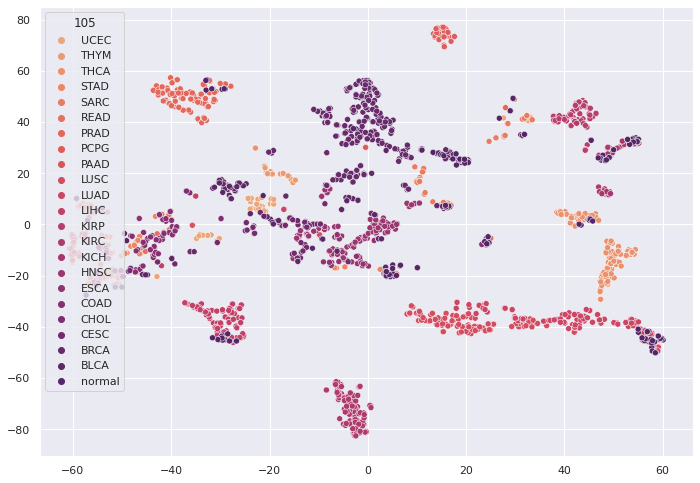

In [ ]:
import numpy as np
from sklearn.datasets import load_digits
from scipy.spatial.distance import pdist
from sklearn.manifold.t_sne import _joint_probabilities
from scipy import linalg
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import squareform
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("flare", 23)

tsne = TSNE()
X_embedded = tsne.fit_transform(X_train)
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_train, legend='full', palette=palette)

## Load Data Train  (Ei purata for smoothed)



In [ ]:
#train load
Cancer = pd.read_csv(
    "/content/drive/MyDrive/capstone_work_part_2/train_data/pan_Cancer_"+str(k)+".txt.bz2",
    header=None, delimiter = "\t")
Normal = pd.read_csv(
    "/content/drive/MyDrive/capstone_work_part_2/train_data/pan_Normal_"+str(k)+".txt.bz2",
    header=None, delimiter = "\t")
Normal = Normal.drop(Normal.index[0])
frame = [Cancer,Normal]
Data = pd.concat(frame,axis=0)
Data = Data.drop(Data.index[0])
#print(Data)
X_train = Data.iloc[:,:gene_con]
y_train = Data.iloc[:,gene_con]

print(X_train.shape)
print(y_train.shape)



(8268, 105)
(8268,)


In [ ]:
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)
print(type(encoded_Y))

<class 'numpy.ndarray'>


In [ ]:
X_train['y'] = encoded_Y
np.random.seed(42)
rndperm = np.random.permutation(Data.shape[0])

In [ ]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_train)
X_train['pca-one'] = pca_result[:,0]
X_train['pca-two'] = pca_result[:,1] 
X_train['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.49805472 0.13024327 0.08123958]


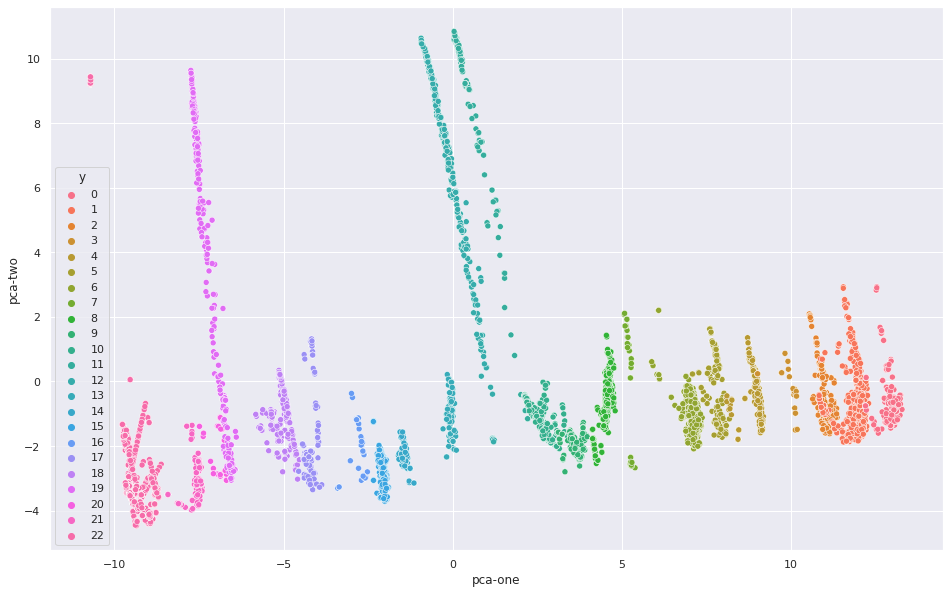

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    #palette=sns.color_palette('bright', X_train.y.unique().shape[0]),
    # palette = sns.color_palette('bright', 23),
    palette = sns.color_palette('husl', X_train.y.unique().shape[0]),
    data=X_train,
    legend="full",
    alpha=1
)

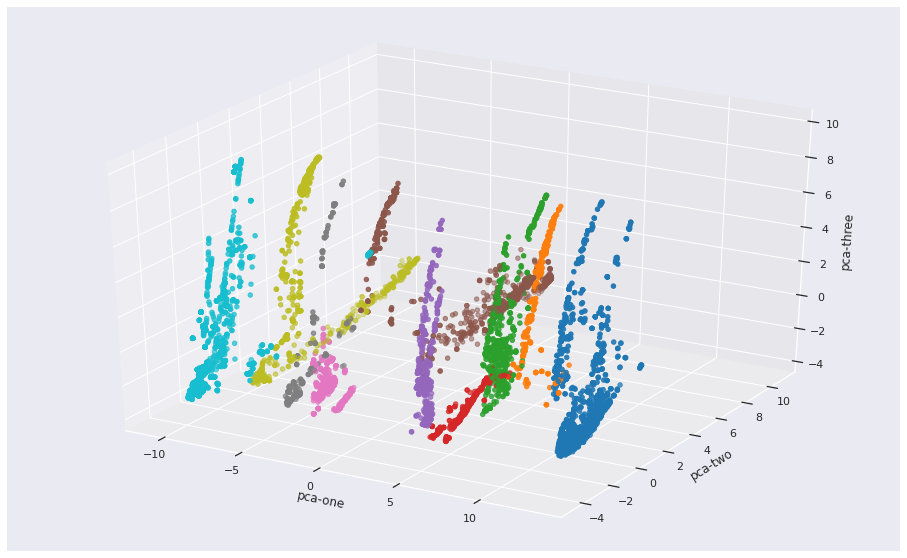

In [ ]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=X_train.iloc[rndperm,:]["pca-one"], 
    ys=X_train.iloc[rndperm,:]["pca-two"], 
    zs=X_train.iloc[rndperm,:]["pca-three"], 
    c=X_train.iloc[rndperm,:]["y"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [ ]:
import plotly.express as px
fig = px.scatter_3d(X_train, x='pca-one', y='pca-two', z='pca-three',color='y')
fig.show()

tsne


In [ ]:
Cancer = pd.read_csv(
    "/content/drive/MyDrive/capstone_work_part_2/train_data/pan_Cancer_"+str(k)+".txt.bz2",
    header=None, delimiter = "\t")
Normal = pd.read_csv(
    "/content/drive/MyDrive/capstone_work_part_2/train_data/pan_Normal_"+str(k)+".txt.bz2",
    header=None, delimiter = "\t")
Normal = Normal.drop(Normal.index[0])
frame = [Cancer,Normal]
Data = pd.concat(frame,axis=0)
Data = Data.drop(Data.index[0])
#print(Data)
X_train = Data.iloc[:,:gene_con]
y_train = Data.iloc[:,gene_con]

print(X_train.shape)
print(y_train.shape)

(8268, 105)
(8268,)


In [ ]:
# #Eta color eksthe input nite 
# colors = []
# temp = input()
# colors = temp.split(" ")
# colors
X_train.shape

(8268, 105)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



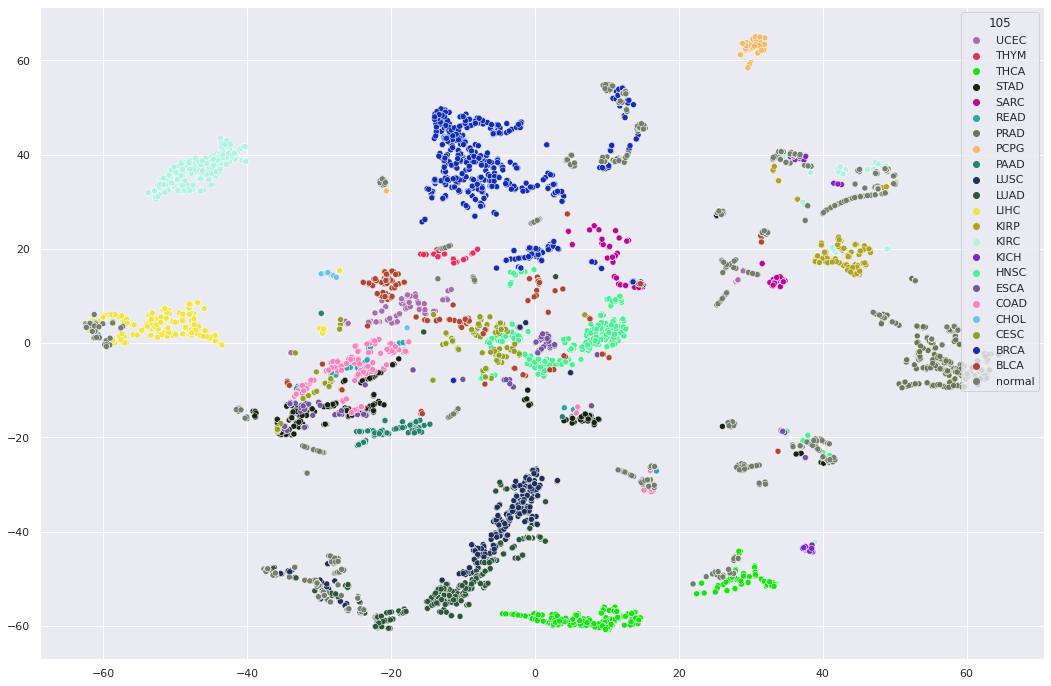

In [ ]:
import numpy as np
from sklearn.datasets import load_digits
from scipy.spatial.distance import pdist
from sklearn.manifold.t_sne import _joint_probabilities
from scipy import linalg
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import squareform
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(18,12)})
# colors = ["#FF0B04", "#4374B3", "#388659", "#2bd9fe",
#           "#90aa86", "#824C71", "#1E3F20", "#94ECBE",
#           "#4C5760", "#A2708A", "#C1F7DC", "#824670",
#           "#FFDF64", "#877B66", "#D4E6B5", "#7C6C77",
#           "#D1D0A3", "#FFE787", "#1F2232", "#596475",
#           "#E88D67", "#7B8CDE", "#DCF763"]# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
palette = sns.color_palette("bright", 23)

tsne = TSNE(perplexity=100)
X_embedded = tsne.fit_transform(X_train)
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_train, legend='full')

# 1. anova_chi_test_n_500

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2 , f_classif,f_regression,mutual_info_classif,mutual_info_regression
from sklearn.svm import SVR

"""# Getting the genes from anova and chi2"""

#cancerXgene list


cancer_names = ["BLCA","BRCA","CESC","CHOL","COAD","ESCA","HNSC","KICH","KIRC","KIRP","LIHC","LUAD","LUSC","PAAD","PCPG","PRAD","READ","SARC","STAD","THCA","THYM","UCEC"]
normal_names = ["BLCA","BRCA","CESC","CHOL","COAD","ESCA","HNSC","KICH","KIRC","KIRP","LIHC","LUAD","LUSC","PAAD","PCPG","PRAD","READ","SARC","STAD","THCA","THYM","UCEC"]

#reading data and doing work
for index in range(len(cancer_names)):
  Cancer = pd.read_csv("/content/drive/MyDrive/capstone_works/cancer/"+cancer_names[index]+".csv.gz", header=None, index_col=None)
  Normal = pd.read_csv("/content/drive/MyDrive/capstone_works/normal/"+normal_names[index]+".norm.csv.gz", header=None, index_col=None) 

  #droping sample names needed man whats your problem?
  Cancer = Cancer.drop(Cancer.index[0])
  Cancer = Cancer.drop(columns=[0])
  Normal = Normal.drop(Normal.index[0])
  Normal = Normal.drop(columns=[0])

  # Cancer.to_csv(r'/content/drive/MyDrive/capstone_work_part_2/cancer_wo_h/'+
  #               cancer_names[index]+'.txt.bz2',compression="bz2", sep='\t',header=None,index=None,index_label=None)
  # Normal.to_csv(r'/content/drive/MyDrive/capstone_work_part_2/normal_wo_h/'+
  #               cancer_names[index]+'.txt.bz2',compression="bz2", sep='\t',header=None,index=None,index_label=None)

  #transpose
  Cancer_T = Cancer.T
  Normal_T = Normal.T

  #setting target
  Cancer_T["20501"] = 1.0
  Normal_T["20501"] = 0.0

  Cancer_T = Cancer_T.T
  Normal_T = Normal_T.T

  Cancer_T = Cancer_T.reset_index(drop=True)
  Normal_T = Normal_T.reset_index(drop=True)

  Cancer_T = Cancer_T.T
  Normal_T = Normal_T.T

  #print(Cancer_T)

  #dropping row
  Normal_T = Normal_T.drop(Normal_T.index[0])

  #concating
  X = pd.concat((Cancer_T,Normal_T),axis=0)
  # X = X.drop(columns = [0])
  # X = X.drop(X.index[0])
  x = X.iloc[:,:20501]
  y = X.iloc[:,20501]

  #print(x)
  #print(y)

  #selecting k value for anova
  k = 5

  #Anova test
  selector = SelectKBest(f_classif, k=k)
  selector.fit(x, y)
  cols_anova = selector.get_support(indices=True)
  np.save("/content/drive/MyDrive/capstone_work_part_2/std_npy/"+cancer_names[index],cols_anova)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252

# 2. Data Process

## Step 1

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2 , f_classif,f_regression,mutual_info_classif,mutual_info_regression
from sklearn.svm import SVR

"""# Frequency Check"""

cancer_names = ["BLCA","BRCA","CESC","CHOL","COAD","ESCA","HNSC","KICH","KIRC","KIRP","LIHC","LUAD","LUSC","PAAD","PCPG","PRAD","READ","SARC","STAD","THCA","THYM","UCEC"]

data = pd.read_csv("/content/drive/MyDrive/capstone_works/cancer/CHOL.csv.gz",header=None)
one_col = data.iloc[:,0:1]
one_col = one_col.drop(one_col.index[0])

gene_frequency = []
#reading data and doing work
for index in range(len(cancer_names)):
  DATA = np.load("/content/drive/MyDrive/capstone_work_part_2/std_npy/"+cancer_names[index]+".npy")
  # print(DATA)
  # print(DATA[0])
  #print(len(DATA))
  for i in range(len(DATA)):
    if (DATA[i] != 0):
      gene_frequency.append(one_col[0][DATA[i]])

np.save("/content/drive/MyDrive/capstone_work_part_2/std_npy/gene_frequency",gene_frequency)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45) have mixed types.Specify dtype option on import or set low_memory=False.



## Step 2

In [ ]:
import numpy as np
import json
import operator
import pandas as pd

gene_freq_count_list = np.load("/content/drive/MyDrive/capstone_work_part_2/std_npy/gene_frequency.npy")
unique_elements, counts_elements = np.unique(gene_freq_count_list, return_counts=True)
print("Unique genes:",len(unique_elements))

top_gene = {}

for i in range(len(unique_elements)):
	top_gene[unique_elements[i]] = counts_elements[i]
sorted_top_gene = dict(sorted(top_gene.items(), key=lambda item: item[1],reverse=True))
import csv
with open('/content/drive/MyDrive/capstone_work_part_2/std_npy/gene_frequency.csv', 'w') as f:
    for key in sorted_top_gene.keys():
        f.write("%s,%d\n"%(key,sorted_top_gene[key]))


np.save("/content/drive/MyDrive/capstone_work_part_2/data/genes_that_willbe_filtered",unique_elements)
data = pd.read_csv("/content/drive/MyDrive/capstone_work_part_2/std_npy/gene_frequency.csv",header=None)
counts = data.groupby(1).count()
counts.to_csv(r'/content/drive/MyDrive/capstone_work_part_2/std_npy/gene_frequency_across_cancer.csv',header=None,index=None,index_label=None)

Unique genes: 105


## Step 3


In [ ]:
## 1. select_gene_name_based_on_h1 ##

import numpy as np
import pandas as pd
import csv
import random

# importing the unique m genes name
unique_genes = np.load("/content/drive/MyDrive/capstone_work_part_2/data/genes_that_willbe_filtered.npy")

# reading and making a dictonary of counted numbers of genes based on their frequency
with open('/content/drive/MyDrive/capstone_work_part_2/std_npy/gene_frequency.csv', mode='r') as infile:
    reader = csv.reader(infile)
    gene_freq_dict = {rows[0]:rows[1] for rows in reader}

# print(type(unique_genes))
# print(unique_genes.shape)
# print(len(unique_genes))
# for gense in unique_genes:
# 	print(gense)

selected_genes = []
genes_with_freq_one = []
genes_with_freq_two = []
genes_with_freq_three = []
for gene in unique_genes:
  # if(gene_freq_dict[gene] == "1"):
  #   genes_with_freq_one.append(gene)
  # elif(gene_freq_dict[gene] == "2"):
  #   genes_with_freq_two.append(gene)
  # elif(gene_freq_dict[gene] == "3"):
  #   genes_with_freq_three.append(gene)
  # else:
  #   selected_genes.append(gene)
  selected_genes.append(gene)
  
#selected_genes = selected_genes[0:round(((len(selected_genes)/100) * 24.22))]
# selected_genes = selected_genes + genes_with_freq_three[0:round(((len(genes_with_freq_three)/100) * 25))] #55% taken
# selected_genes = selected_genes + genes_with_freq_two[0:round(((len(genes_with_freq_two)/100) * 15))] #45% taken
# selected_genes = selected_genes + genes_with_freq_one[0:round(((len(genes_with_freq_one)/100) * 5))] #55% taken

np.save("/content/drive/MyDrive/capstone_work_part_2/data/selected_genes_h2", selected_genes)

print(len(selected_genes))

gene_con = len(selected_genes)


105


## Step 4

In [ ]:
## 2. select_gene_need_to_drop_h1 ##

import numpy as np
import pandas as pd
import csv
import random

cancer_names = ["BLCA","BRCA","CESC","CHOL","COAD","ESCA","HNSC","KICH","KIRC","KIRP","LIHC","LUAD","LUSC","PAAD","PCPG","PRAD","READ","SARC","STAD","THCA","THYM","UCEC"]

selected_genes = np.load("/content/drive/MyDrive/capstone_work_part_2/data/selected_genes_h2.npy")
print(len(selected_genes))
data = pd.read_csv("/content/drive/MyDrive/capstone_works/cancer/KICH.csv.gz",header=None)
header_gene_names =  data.iloc[:,0:1]
header_gene_names = header_gene_names.drop(header_gene_names.index[0])
header_gene_names.reset_index(drop=True, inplace=True)
# print(header_gene_names)
# print(header_gene_names.shape)

data_read = pd.read_csv(r"/content/drive/MyDrive/capstone_work_part_2/cancer_wo_h/KICH.txt.bz2",header=None, delimiter = '\t')
# print(data_read)
#print(header_gene_names.shape)
#print(data_read.shape)

# adding gene names in a std cancer data

frame0 = [data_read,header_gene_names]
data_cancer_early = pd.concat(frame0, axis = 1)
data_cancer_early = data_cancer_early.T
data_cancer_early.reset_index(drop=True, inplace=True)


cols_exist = []
cols_to_del = []

#print(data_cancer_early)

# selecting the genes that we need from "selected genes"
for i in range(20501):
	for j in range(len(selected_genes)):
		if(data_cancer_early[i][91] == selected_genes[j]):
			cols_exist.append(i)

# selecting the genes that we need to drop from "cols_to_exist"
for i in range(20501):
	if(i not in cols_exist):
		cols_to_del.append(i)

print(len(cols_to_del))
# saving the genes that we need to drop
np.save("/content/drive/MyDrive/capstone_work_part_2/data/genes_to_del_500k_h2",cols_to_del)


105


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91) have mixed types.Specify dtype option on import or set low_memory=False.



20396


## Step 5

In [ ]:
## 3. save_data_after_gene_del_h2 ##

import numpy as np
import pandas as pd
import csv
import random
from sklearn.preprocessing import StandardScaler

cancer_names = ["BLCA","BRCA","CESC","CHOL","COAD","ESCA","HNSC","KICH","KIRC","KIRP","LIHC","LUAD","LUSC","PAAD","PCPG","PRAD","READ","SARC","STAD","THCA","THYM","UCEC"]

# loading the genes that need to delete and saving the data again after removing the deleted genes
selected_genes = np.load("/content/drive/MyDrive/capstone_work_part_2/data/genes_to_del_500k_h2.npy")
print(len(selected_genes))

for index in range(len(cancer_names)):
  Cancer = pd.read_csv("/content/drive/MyDrive/capstone_work_part_2/cancer_wo_h/"+
                       cancer_names[index]+".txt.bz2",header=None, delimiter = '\t')
  Normal = pd.read_csv("/content/drive/MyDrive/capstone_work_part_2/normal_wo_h/"+
                       cancer_names[index]+".txt.bz2",header=None, delimiter = '\t')

  Cancer = Cancer.T
  Normal = Normal.T

  cancer = Cancer.drop(columns = selected_genes)
  normal = Normal.drop(columns = selected_genes)

  print(cancer.shape)
  print(normal.shape)

  cancer = cancer.T
  normal = normal.T

  std_scaler_can = StandardScaler()
  std_scaler_norm = StandardScaler()

  cancer = pd.DataFrame(std_scaler_can.fit_transform(cancer), columns=cancer.columns)
  normal = pd.DataFrame(std_scaler_norm.fit_transform(normal), columns=normal.columns)

  cancer.to_csv(r'/content/drive/MyDrive/capstone_work_part_2/mahin/data_k_50/cancer/'+
                cancer_names[index]+'unsmoothed.txt.bz2',compression="bz2", sep='\t',header=None,index=None,index_label=None)
  normal.to_csv(r'/content/drive/MyDrive/capstone_work_part_2/mahin/data_k_50/normal/'+
                cancer_names[index]+'unsmoothed.txt.bz2',compression="bz2", sep='\t',header=None,index=None,index_label=None)



20396
(427, 105)
(19, 105)
(1212, 105)
(112, 105)
(309, 105)
(3, 105)
(45, 105)
(9, 105)
(328, 105)
(26, 105)
(196, 105)
(11, 105)
(566, 105)
(43, 105)
(91, 105)
(25, 105)
(606, 105)
(72, 105)
(323, 105)
(32, 105)
(423, 105)
(50, 105)
(576, 105)
(58, 105)
(552, 105)
(51, 105)
(183, 105)
(4, 105)
(187, 105)
(3, 105)
(550, 105)
(52, 105)
(105, 105)
(6, 105)
(265, 105)
(2, 105)
(450, 105)
(32, 105)
(568, 105)
(59, 105)
(122, 105)
(2, 105)
(201, 105)
(7, 105)


## test train split for cancer (manually)

In [ ]:
#for cancer

import numpy as np
import pandas as pd
import csv
import random
from sklearn.preprocessing import StandardScaler

cancer_names = ["BLCA","BRCA","CESC","CHOL","COAD","ESCA","HNSC","KICH","KIRC","KIRP","LIHC","LUAD","LUSC","PAAD","PCPG","PRAD","READ","SARC","STAD","THCA","THYM","UCEC"]
#len(cancer_names)
for index in range(len(cancer_names)):
  Cancer = pd.read_csv("/content/drive/MyDrive/capstone_work_part_2/mahin/data_k_50/cancer/"+
                       cancer_names[index]+"unsmoothed.txt.bz2",header=None, delimiter = '\t')
  print(cancer_names[index])
  print(len(Cancer.columns))
  val_train = round((len(Cancer.columns) * 75) / 100) 
  val_test = len(Cancer.columns) - val_train
  print(val_train)
  print(val_test)
  print()
  i = 0

  cols_for_test = []
  cols_for_train = []

  while i < val_test:
    x = random.randint(0,(len(Cancer.columns)-1))
    if x not in cols_for_test:
      cols_for_test.append(x)
      i += 1
  i = 0
  while i < val_train:
    x = random.randint(0,(len(Cancer.columns)-1))
    if x not in cols_for_test:
      if x not in cols_for_train:
        cols_for_train.append(x)
        i += 1

  test_cancer = Cancer.drop(columns = cols_for_train)
  train_cancer = Cancer.drop(columns = cols_for_test)

  test_cancer.to_csv(r'/content/drive/MyDrive/capstone_work_part_2/test_data/cancer/'+
                     cancer_names[index]+'unsmoothed.txt.bz2',compression="bz2", sep='\t',header=None,index=None,index_label=None)
  train_cancer.to_csv(r'/content/drive/MyDrive/capstone_work_part_2/pre_upsample_train_data/cancer/'+
                      cancer_names[index]+'unsmoothed.txt.bz2',compression="bz2", sep='\t',header=None,index=None,index_label=None)


BLCA
427
320
107

BRCA
1212
909
303

CESC
309
232
77

CHOL
45
34
11

COAD
328
246
82

ESCA
196
147
49

HNSC
566
424
142

KICH
91
68
23

KIRC
606
454
152

KIRP
323
242
81

LIHC
423
317
106

LUAD
576
432
144

LUSC
552
414
138

PAAD
183
137
46

PCPG
187
140
47

PRAD
550
412
138

READ
105
79
26

SARC
265
199
66

STAD
450
338
112

THCA
568
426
142

THYM
122
92
30

UCEC
201
151
50



## test train split for normal (manually)

In [ ]:
#for normal

import numpy as np
import pandas as pd
import csv
import random
from sklearn.preprocessing import StandardScaler

cancer_names = ["BLCA","BRCA","CESC","CHOL","COAD","ESCA","HNSC","KICH",
                "KIRC","KIRP","LIHC","LUAD","LUSC","PAAD","PCPG","PRAD",
                "READ","SARC","STAD","THCA","THYM","UCEC"]
#len(cancer_names)
for index in range(len(cancer_names)):
  Cancer = pd.read_csv("/content/drive/MyDrive/capstone_work_part_2/mahin/data_k_50/normal/"+
                       cancer_names[index]+"unsmoothed.txt.bz2",header=None, delimiter = '\t')
  print(cancer_names[index])
  print(len(Cancer.columns))
  if(len(Cancer.columns) != 2):
    val_train = round((len(Cancer.columns) * 75) / 100) 
    val_test = len(Cancer.columns) - val_train
    print(val_train)
    print(val_test)
    print()
    i = 0

    cols_for_test = []
    cols_for_train = []

    while i < val_test:
      x = random.randint(0,(len(Cancer.columns)-1))
      if x not in cols_for_test:
        cols_for_test.append(x)
        i += 1
    i = 0
    while i < val_train:
      x = random.randint(0,(len(Cancer.columns)-1))
      if x not in cols_for_test:
        if x not in cols_for_train:
          cols_for_train.append(x)
          i += 1

    test_cancer = Cancer.drop(columns = cols_for_train)
    train_cancer = Cancer.drop(columns = cols_for_test)

    test_cancer.to_csv(r'/content/drive/MyDrive/capstone_work_part_2/test_data/normal/'+
                      cancer_names[index]+'unsmoothed.txt.bz2',compression="bz2", sep='\t',header=None,index=None,index_label=None)
    train_cancer.to_csv(r'/content/drive/MyDrive/capstone_work_part_2/pre_upsample_train_data/normal/'+
                        cancer_names[index]+'unsmoothed.txt.bz2',compression="bz2", sep='\t',header=None,index=None,index_label=None)

  else:
    val_train = 2
    val_test = 1
    print(val_train)
    print(val_test)
    print()
    cols_for_train = [1]
    test_cancer = Cancer.drop(columns = cols_for_train)
    train_cancer = Cancer

    test_cancer.to_csv(r'/content/drive/MyDrive/capstone_work_part_2/test_data/normal/'+
                  cancer_names[index]+'unsmoothed.txt.bz2',compression="bz2", sep='\t',header=None,index=None,index_label=None)
    train_cancer.to_csv(r'/content/drive/MyDrive/capstone_work_part_2/pre_upsample_train_data/normal/'+
                        cancer_names[index]+'unsmoothed.txt.bz2',compression="bz2", sep='\t',header=None,index=None,index_label=None)



BLCA
19
14
5

BRCA
112
84
28

CESC
3
2
1

CHOL
9
7
2

COAD
26
20
6

ESCA
11
8
3

HNSC
43
32
11

KICH
25
19
6

KIRC
72
54
18

KIRP
32
24
8

LIHC
50
38
12

LUAD
58
44
14

LUSC
51
38
13

PAAD
4
3
1

PCPG
3
2
1

PRAD
52
39
13

READ
6
4
2

SARC
2
2
1

STAD
32
24
8

THCA
59
44
15

THYM
2
2
1

UCEC
7
5
2



## upsampling train data set in 3:1




In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter

cancer_names = ["BLCA","BRCA","CESC","CHOL","COAD","ESCA","HNSC","KICH",
                "KIRC","KIRP","LIHC","LUAD","LUSC","PAAD","PCPG","PRAD",
                "READ","SARC","STAD","THCA","THYM","UCEC"]

#len(cancer_names)

for index in range(len(cancer_names)):
  Cancer = pd.read_csv("/content/drive/MyDrive/capstone_work_part_2/pre_upsample_train_data/cancer/"+
                       cancer_names[index]+"unsmoothed.txt.bz2",header=None, delimiter = '\t')
  Normal = pd.read_csv("/content/drive/MyDrive/capstone_work_part_2/pre_upsample_train_data/normal/"+
                       cancer_names[index]+"unsmoothed.txt.bz2",header=None, delimiter = '\t')

  # print(Cancer)
  # print(Normal)
  can_sample = len(Cancer.columns)
  norm_sample = len(Normal.columns)

  # print(can_sample)
  # print(norm_sample)
  
  Cancer = Cancer.T
  Normal = Normal.T

  if( norm_sample <= round(can_sample/3) ):
    ## adding target in the last col
    Cancer[str(gene_con)] = 1
    Normal[str(gene_con)] = 0
    
    #print(Cancer)

    frame = [Cancer,Normal]
    Data = pd.concat(frame,axis=0)

    #print(Data)

    x = Data.iloc[:,:gene_con]
    y = Data.iloc[:,gene_con]
    #print(x)
    #print(y)

    # summarize class distribution
    counter = Counter(y)
    print(counter)
    # transform the dataset
    oversample = SMOTE(k_neighbors=1, sampling_strategy=0.3333)
    X, y = oversample.fit_resample(x, y)
    # summarize the new class distribution
    counter = Counter(y)
    print(counter)
    #[1:,1:],index=data[1:,0],columns=data[0,1:]
    X = pd.DataFrame(data=X)
    y = pd.DataFrame(data=y)

    data = pd.concat([X,y], axis = 1)
    data = data.T
    data = data.reset_index(drop=True)
    #print(data)
    #print(len(data.columns))
    can = []
    norm = []
    for x in range(len(data.columns)):
      if(data[x][gene_con]==0):
        norm.append(x)
      elif(data[x][gene_con]==1):
        can.append(x)

    drops_for_can = []

    for x in range(len(data.columns)):
      if(x not in can):
        drops_for_can.append(x)
    Cancer = data.drop(columns=drops_for_can)

    drops_for_norm = []

    for x in range(len(data.columns)):
      if(x not in norm):
        drops_for_norm.append(x)
    Normal = data.drop(columns=drops_for_norm)

    Cancer = Cancer.drop(Cancer.index[gene_con])
    Normal = Normal.drop(Normal.index[gene_con])

    # Cancer = Cancer.T
    # Normal = Normal.T

    #print(Cancer)

    Cancer.to_csv(r'/content/drive/MyDrive/capstone_work_part_2/train_data/cancer/'+
                  cancer_names[index]+'unsmoothed.txt.bz2',compression="bz2", sep='\t',header=None,index=None,index_label=None)
    Normal.to_csv(r'/content/drive/MyDrive/capstone_work_part_2/train_data/normal/'+
                  cancer_names[index]+'unsmoothed.txt.bz2',compression="bz2", sep='\t',header=None,index=None,index_label=None)


Counter({1: 320, 0: 14})
Counter({1: 320, 0: 106})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Counter({1: 909, 0: 84})
Counter({1: 909, 0: 302})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Counter({1: 232, 0: 2})
Counter({1: 232, 0: 77})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Counter({1: 34, 0: 7})
Counter({1: 34, 0: 11})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Counter({1: 246, 0: 20})
Counter({1: 246, 0: 81})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Counter({1: 147, 0: 8})
Counter({1: 147, 0: 48})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Counter({1: 424, 0: 32})
Counter({1: 424, 0: 141})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Counter({1: 68, 0: 19})
Counter({1: 68, 0: 22})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Counter({1: 454, 0: 54})
Counter({1: 454, 0: 151})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Counter({1: 242, 0: 24})
Counter({1: 242, 0: 80})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Counter({1: 317, 0: 38})
Counter({1: 317, 0: 105})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Counter({1: 432, 0: 44})
Counter({1: 432, 0: 143})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Counter({1: 414, 0: 38})
Counter({1: 414, 0: 137})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Counter({1: 137, 0: 3})
Counter({1: 137, 0: 45})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Counter({1: 140, 0: 2})
Counter({1: 140, 0: 46})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Counter({1: 412, 0: 39})
Counter({1: 412, 0: 137})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Counter({1: 79, 0: 4})
Counter({1: 79, 0: 26})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Counter({1: 199, 0: 2})
Counter({1: 199, 0: 66})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Counter({1: 338, 0: 24})
Counter({1: 338, 0: 112})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Counter({1: 426, 0: 44})
Counter({1: 426, 0: 141})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Counter({1: 92, 0: 2})
Counter({1: 92, 0: 30})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Counter({1: 151, 0: 5})
Counter({1: 151, 0: 50})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



## merging bin train data

In [ ]:
## 4. merging_data_h1 ##

import numpy as np
import pandas as pd

cancer_names = ["BLCA","BRCA","CESC","CHOL","COAD","ESCA","HNSC",
                "KICH","KIRC","KIRP","LIHC","LUAD","LUSC","PAAD",
                "PCPG","PRAD","READ","SARC","STAD","THCA","THYM",
                "UCEC"]

#reading data and doing work
cresult=pd.DataFrame()
nresult=pd.DataFrame()
for index in range(len(cancer_names)):
  Cancer = pd.read_csv("/content/drive/MyDrive/capstone_work_part_2/train_data/cancer/"+
                       cancer_names[index]+"unsmoothed.txt.bz2",header=None, delimiter = "\t")
  Normal = pd.read_csv("/content/drive/MyDrive/capstone_work_part_2/train_data/normal/"+
                       cancer_names[index]+"unsmoothed.txt.bz2",header=None, delimiter = "\t")
  
  Cancer= Cancer.T
  Normal=Normal.T
  
  frames1 = [Cancer, cresult]
  cresult = pd.concat(frames1)
  
  frames2 = [Normal, nresult]
  nresult = pd.concat(frames2)
  
  print(cresult.shape)
  print(nresult.shape)
  
# merging all the cancer and normal data together and saving them  
cresult.to_csv(r'/content/drive/MyDrive/capstone_work_part_2/train_data/bin_Cancer_'+str(k)+'unsmoothed.txt.bz2',
               compression="bz2", sep='\t',header=None,index=None,index_label=None)

nresult.to_csv(r'/content/drive/MyDrive/capstone_work_part_2/train_data/bin_Normal_'+str(k)+'unsmoothed.txt.bz2',
               compression="bz2", sep='\t',header=None,index=None,index_label=None)
  
  


(320, 105)
(106, 105)
(1229, 105)
(408, 105)
(1461, 105)
(485, 105)
(1495, 105)
(496, 105)
(1741, 105)
(577, 105)
(1888, 105)
(625, 105)
(2312, 105)
(766, 105)
(2380, 105)
(788, 105)
(2834, 105)
(939, 105)
(3076, 105)
(1019, 105)
(3393, 105)
(1124, 105)
(3825, 105)
(1267, 105)
(4239, 105)
(1404, 105)
(4376, 105)
(1449, 105)
(4516, 105)
(1495, 105)
(4928, 105)
(1632, 105)
(5007, 105)
(1658, 105)
(5206, 105)
(1724, 105)
(5544, 105)
(1836, 105)
(5970, 105)
(1977, 105)
(6062, 105)
(2007, 105)
(6213, 105)
(2057, 105)


## merging bin test data

In [ ]:
## 4. merging_data_h1 ##

import numpy as np
import pandas as pd

cancer_names = ["BLCA","BRCA","CESC","CHOL","COAD","ESCA","HNSC",
                "KICH","KIRC","KIRP","LIHC","LUAD","LUSC","PAAD",
                "PCPG","PRAD","READ","SARC","STAD","THCA","THYM",
                "UCEC"]

#reading data and doing work
cresult=pd.DataFrame()
nresult=pd.DataFrame()
for index in range(len(cancer_names)):
  Cancer = pd.read_csv("/content/drive/MyDrive/capstone_work_part_2/test_data/cancer/"+
                       cancer_names[index]+"unsmoothed.txt.bz2",header=None, delimiter = "\t")
  Normal = pd.read_csv("/content/drive/MyDrive/capstone_work_part_2/test_data/normal/"+
                       cancer_names[index]+"unsmoothed.txt.bz2",header=None, delimiter = "\t")
  
  Cancer= Cancer.T
  Normal=Normal.T
  
  frames1 = [Cancer, cresult]
  cresult = pd.concat(frames1)
  
  frames2 = [Normal, nresult]
  nresult = pd.concat(frames2)
  
  print(cresult.shape)
  print(nresult.shape)
  
# merging all the cancer and normal data together and saving them  
cresult.to_csv(r'/content/drive/MyDrive/capstone_work_part_2/test_data/bin_Cancer_'+str(k)+'unsmoothed.txt.bz2',
               compression="bz2", sep='\t',header=None,index=None,index_label=None)

nresult.to_csv(r'/content/drive/MyDrive/capstone_work_part_2/test_data/bin_Normal_'+str(k)+'unsmoothed.txt.bz2',
               compression="bz2", sep='\t',header=None,index=None,index_label=None)
  
  


(107, 105)
(5, 105)
(410, 105)
(33, 105)
(487, 105)
(34, 105)
(498, 105)
(36, 105)
(580, 105)
(42, 105)
(629, 105)
(45, 105)
(771, 105)
(56, 105)
(794, 105)
(62, 105)
(946, 105)
(80, 105)
(1027, 105)
(88, 105)
(1133, 105)
(100, 105)
(1277, 105)
(114, 105)
(1415, 105)
(127, 105)
(1461, 105)
(128, 105)
(1508, 105)
(129, 105)
(1646, 105)
(142, 105)
(1672, 105)
(144, 105)
(1738, 105)
(145, 105)
(1850, 105)
(153, 105)
(1992, 105)
(168, 105)
(2022, 105)
(169, 105)
(2072, 105)
(171, 105)


# tcga pan data merging

## train


In [ ]:
## HYPOTHESIS 1 ##

import numpy as np
import pandas as pd
from collections import Counter
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import matthews_corrcoef
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

cancer_names = ["BLCA","BRCA","CESC","CHOL","COAD","ESCA","HNSC",
                "KICH","KIRC","KIRP","LIHC","LUAD","LUSC","PAAD",
                "PCPG","PRAD","READ","SARC","STAD","THCA","THYM",
                "UCEC"]


#reading data and doing work
cresult=pd.DataFrame()
nresult=pd.DataFrame()
print(len(cancer_names))
for index in range(len(cancer_names)):
  Cancer = pd.read_csv("/content/drive/MyDrive/capstone_work_part_2/train_data/cancer/"+
                       cancer_names[index]+"unsmoothed.txt.bz2",header=None, delimiter = "\t")
  Normal = pd.read_csv("/content/drive/MyDrive/capstone_work_part_2/train_data/normal/"+
                       cancer_names[index]+"unsmoothed.txt.bz2",header=None, delimiter = "\t")

  Cancer = Cancer.T
  Normal = Normal.T
  #print(Cancer)
  #print(Normal)

  Cancer['target'] = cancer_names[index]
  Normal['target'] = "normal"

  frames1 = [Cancer, cresult]
  cresult = pd.concat(frames1)
  
  frames2 = [Normal, nresult]
  nresult = pd.concat(frames2)
  
  print(cresult.shape)
  print(nresult.shape)
  

# merging all the cancer and normal data together separately and saving them  
cresult.to_csv(r'/content/drive/MyDrive/capstone_work_part_2/train_data/pan_Cancer_'+str(k)+'unsmoothed.txt.bz2',
               compression="bz2", sep='\t',header=None,index=None,index_label=None)

nresult.to_csv(r'/content/drive/MyDrive/capstone_work_part_2/train_data/pan_Normal_'+str(k)+'unsmoothed.txt.bz2',
               compression="bz2", sep='\t',header=None,index=None,index_label=None)


22
(320, 106)
(106, 106)
(1229, 106)
(408, 106)
(1461, 106)
(485, 106)
(1495, 106)
(496, 106)
(1741, 106)
(577, 106)
(1888, 106)
(625, 106)
(2312, 106)
(766, 106)
(2380, 106)
(788, 106)
(2834, 106)
(939, 106)
(3076, 106)
(1019, 106)
(3393, 106)
(1124, 106)
(3825, 106)
(1267, 106)
(4239, 106)
(1404, 106)
(4376, 106)
(1449, 106)
(4516, 106)
(1495, 106)
(4928, 106)
(1632, 106)
(5007, 106)
(1658, 106)
(5206, 106)
(1724, 106)
(5544, 106)
(1836, 106)
(5970, 106)
(1977, 106)
(6062, 106)
(2007, 106)
(6213, 106)
(2057, 106)


## test

In [ ]:
## HYPOTHESIS 1 ##

import numpy as np
import pandas as pd
from collections import Counter
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import matthews_corrcoef
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

cancer_names = ["BLCA","BRCA","CESC","CHOL","COAD","ESCA","HNSC",
                "KICH","KIRC","KIRP","LIHC","LUAD","LUSC","PAAD",
                "PCPG","PRAD","READ","SARC","STAD","THCA","THYM",
                "UCEC"]


#reading data and doing work
cresult=pd.DataFrame()
nresult=pd.DataFrame()
print(len(cancer_names))
for index in range(len(cancer_names)):
  Cancer = pd.read_csv("/content/drive/MyDrive/capstone_work_part_2/test_data/cancer/"+
                       cancer_names[index]+"unsmoothed.txt.bz2",header=None, delimiter = "\t")
  Normal = pd.read_csv("/content/drive/MyDrive/capstone_work_part_2/test_data/normal/"+
                       cancer_names[index]+"unsmoothed.txt.bz2",header=None, delimiter = "\t")

  Cancer = Cancer.T
  Normal = Normal.T
  #print(Cancer)
  #print(Normal)

  Cancer['target'] = cancer_names[index]
  Normal['target'] = "normal"

  frames1 = [Cancer, cresult]
  cresult = pd.concat(frames1)
  
  frames2 = [Normal, nresult]
  nresult = pd.concat(frames2)
  
  print(cresult.shape)
  print(nresult.shape)
  

# merging all the cancer and normal data together separately and saving them  
cresult.to_csv(r'/content/drive/MyDrive/capstone_work_part_2/test_data/pan_Cancer_'+str(k)+'unsmoothed.txt.bz2',
               compression="bz2", sep='\t',header=None,index=None,index_label=None)

nresult.to_csv(r'/content/drive/MyDrive/capstone_work_part_2/test_data/pan_Normal_'+str(k)+'unsmoothed.txt.bz2',
               compression="bz2", sep='\t',header=None,index=None,index_label=None)


22
(107, 106)
(5, 106)
(410, 106)
(33, 106)
(487, 106)
(34, 106)
(498, 106)
(36, 106)
(580, 106)
(42, 106)
(629, 106)
(45, 106)
(771, 106)
(56, 106)
(794, 106)
(62, 106)
(946, 106)
(80, 106)
(1027, 106)
(88, 106)
(1133, 106)
(100, 106)
(1277, 106)
(114, 106)
(1415, 106)
(127, 106)
(1461, 106)
(128, 106)
(1508, 106)
(129, 106)
(1646, 106)
(142, 106)
(1672, 106)
(144, 106)
(1738, 106)
(145, 106)
(1850, 106)
(153, 106)
(1992, 106)
(168, 106)
(2022, 106)
(169, 106)
(2072, 106)
(171, 106)


# TSNE

## Load Data test


In [ ]:
#train load
Cancer = pd.read_csv(
    "/content/drive/MyDrive/capstone_work_part_2/test_data/pan_Cancer_"+str(k)+"unsmoothed.txt.bz2",
    header=None, delimiter = "\t")
Normal = pd.read_csv(
    "/content/drive/MyDrive/capstone_work_part_2/test_data/pan_Normal_"+str(k)+"unsmoothed.txt.bz2",
    header=None, delimiter = "\t")
Normal = Normal.drop(Normal.index[0])
frame = [Cancer,Normal]
Data = pd.concat(frame,axis=0)
Data = Data.drop(Data.index[0])
#print(Data)
X_train = Data.iloc[:,:gene_con]
y_train = Data.iloc[:,gene_con]

print(X_train.shape)
print(y_train.shape)



(2241, 105)
(2241,)


In [ ]:
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)
print(type(encoded_Y))

<class 'numpy.ndarray'>


In [ ]:
X_train['y'] = encoded_Y
np.random.seed(42)
rndperm = np.random.permutation(Data.shape[0])

In [ ]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_train)
X_train['pca-one'] = pca_result[:,0]
X_train['pca-two'] = pca_result[:,1] 
X_train['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.42848605 0.1150278  0.07841105]


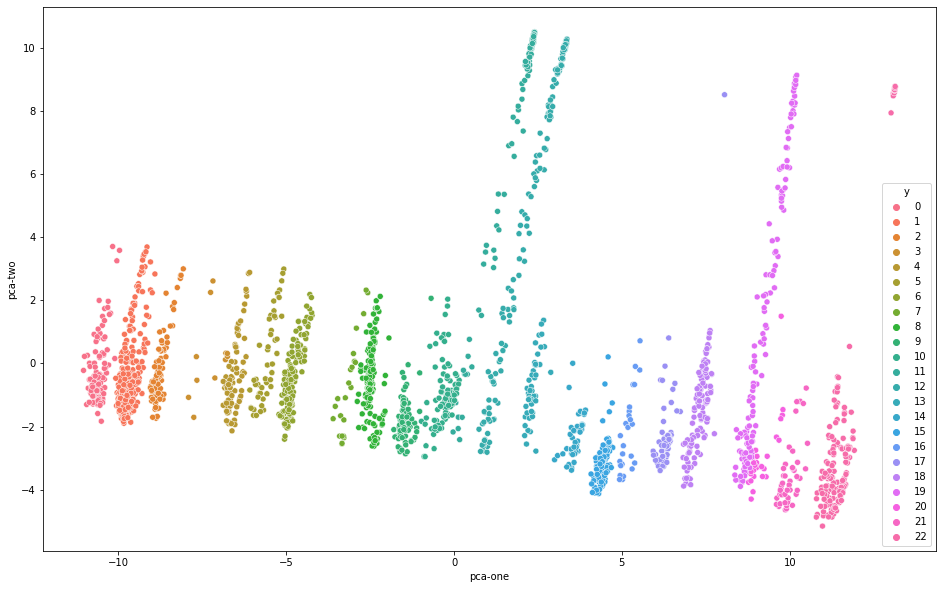

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    #palette=sns.color_palette('bright', X_train.y.unique().shape[0]),
    # palette = sns.color_palette('bright', 23),
    palette = sns.color_palette('husl', X_train.y.unique().shape[0]),
    data=X_train,
    legend="full",
    alpha=1
)

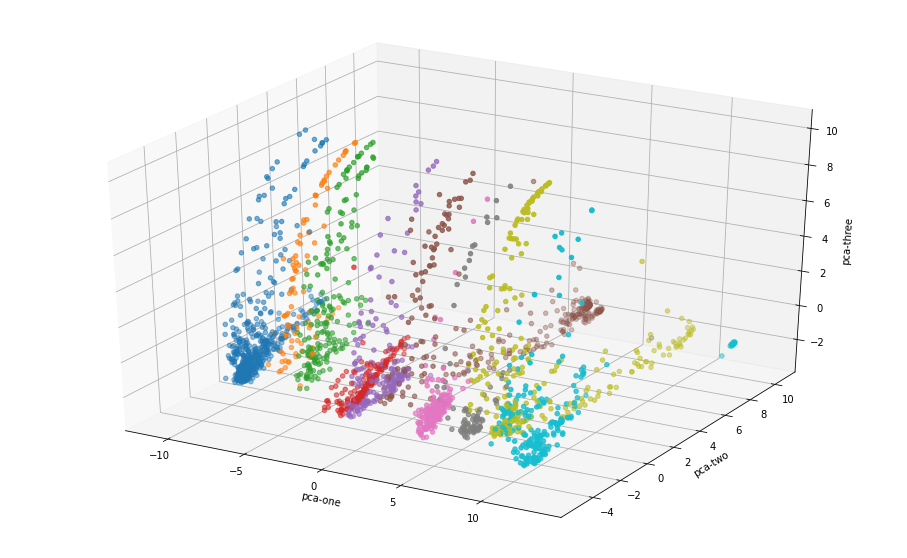

In [ ]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=X_train.iloc[rndperm,:]["pca-one"], 
    ys=X_train.iloc[rndperm,:]["pca-two"], 
    zs=X_train.iloc[rndperm,:]["pca-three"], 
    c=X_train.iloc[rndperm,:]["y"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [ ]:
import plotly.express as px
fig = px.scatter_3d(X_train, x='pca-one', y='pca-two', z='pca-three',color='y')
fig.show()

tsne


In [ ]:
Cancer = pd.read_csv(
    "/content/drive/MyDrive/capstone_work_part_2/test_data/pan_Cancer_"+str(k)+"unsmoothed.txt.bz2",
    header=None, delimiter = "\t")
Normal = pd.read_csv(
    "/content/drive/MyDrive/capstone_work_part_2/test_data/pan_Normal_"+str(k)+"unsmoothed.txt.bz2",
    header=None, delimiter = "\t")
Normal = Normal.drop(Normal.index[0])
frame = [Cancer,Normal]
Data = pd.concat(frame,axis=0)
Data = Data.drop(Data.index[0])
#print(Data)
X_train = Data.iloc[:,:gene_con]
y_train = Data.iloc[:,gene_con]

print(X_train.shape)
print(y_train.shape)

(2241, 105)
(2241,)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



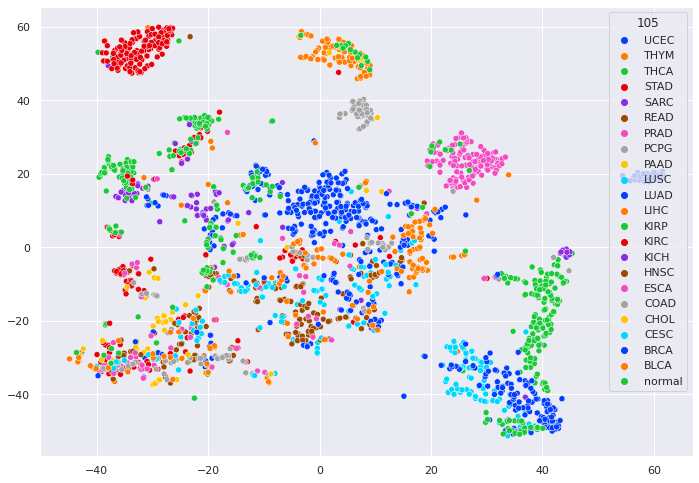

In [ ]:
import numpy as np
from sklearn.datasets import load_digits
from scipy.spatial.distance import pdist
from sklearn.manifold.t_sne import _joint_probabilities
from scipy import linalg
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import squareform
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 23)

tsne = TSNE()
X_embedded = tsne.fit_transform(X_train)
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_train, legend='full', palette=palette)

## Load Data Train (Ei purata for unsmoothed)



In [ ]:
#train load
Cancer = pd.read_csv(
    "/content/drive/MyDrive/capstone_work_part_2/train_data/pan_Cancer_"+str(k)+"unsmoothed.txt.bz2",
    header=None, delimiter = "\t")
Normal = pd.read_csv(
    "/content/drive/MyDrive/capstone_work_part_2/train_data/pan_Normal_"+str(k)+"unsmoothed.txt.bz2",
    header=None, delimiter = "\t")
Normal = Normal.drop(Normal.index[0])
frame = [Cancer,Normal]
Data = pd.concat(frame,axis=0)
Data = Data.drop(Data.index[0])
#print(Data)
X_train = Data.iloc[:,:gene_con]
y_train = Data.iloc[:,gene_con]

print(X_train.shape)
print(y_train.shape)



(8268, 105)
(8268,)


In [ ]:
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)
print(type(encoded_Y))

<class 'numpy.ndarray'>


In [ ]:
X_train['y'] = encoded_Y
np.random.seed(42)
rndperm = np.random.permutation(Data.shape[0])

In [ ]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_train)
X_train['pca-one'] = pca_result[:,0]
X_train['pca-two'] = pca_result[:,1] 
X_train['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.47881733 0.11617939 0.0660223 ]


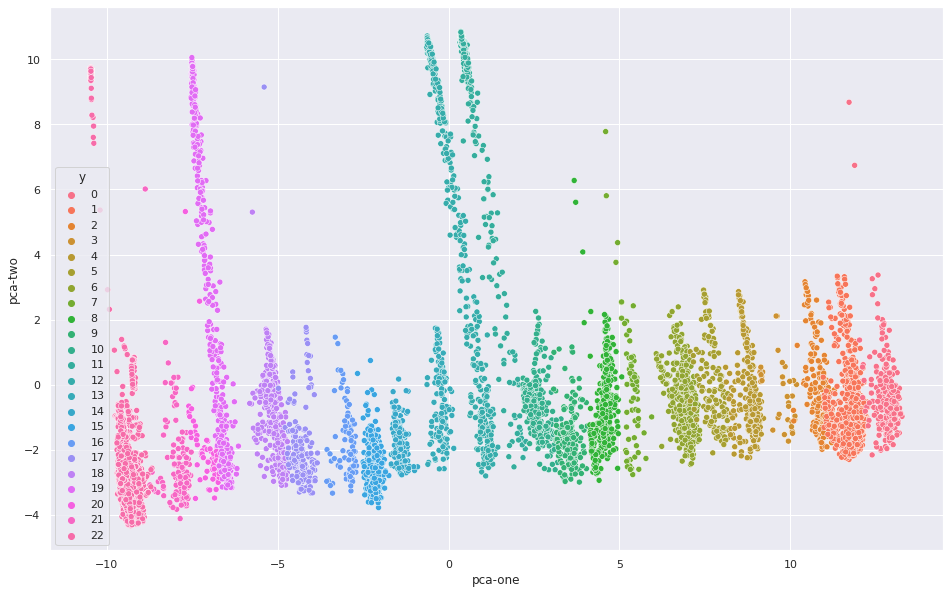

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    #palette=sns.color_palette('bright', X_train.y.unique().shape[0]),
    # palette = sns.color_palette('bright', 23),
    palette = sns.color_palette('husl', X_train.y.unique().shape[0]),
    data=X_train,
    legend="full",
    alpha=1
)

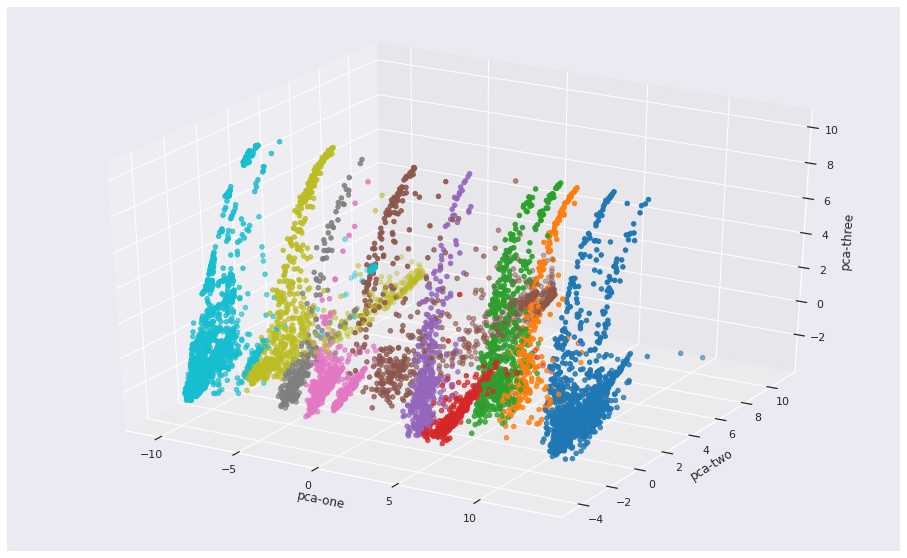

In [ ]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=X_train.iloc[rndperm,:]["pca-one"], 
    ys=X_train.iloc[rndperm,:]["pca-two"], 
    zs=X_train.iloc[rndperm,:]["pca-three"], 
    c=X_train.iloc[rndperm,:]["y"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [ ]:
import plotly.express as px
fig = px.scatter_3d(X_train, x='pca-one', y='pca-two', z='pca-three',color='y')
fig.show()

tsne


In [ ]:
Cancer = pd.read_csv(
    "/content/drive/MyDrive/capstone_work_part_2/train_data/pan_Cancer_"+str(k)+"unsmoothed.txt.bz2",
    header=None, delimiter = "\t")
Normal = pd.read_csv(
    "/content/drive/MyDrive/capstone_work_part_2/train_data/pan_Normal_"+str(k)+"unsmoothed.txt.bz2",
    header=None, delimiter = "\t")
Normal = Normal.drop(Normal.index[0])
frame = [Cancer,Normal]
Data = pd.concat(frame,axis=0)
Data = Data.drop(Data.index[0])
#print(Data)
X_train = Data.iloc[:,:gene_con]
y_train = Data.iloc[:,gene_con]

print(X_train.shape)
print(y_train.shape)

(8268, 105)
(8268,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



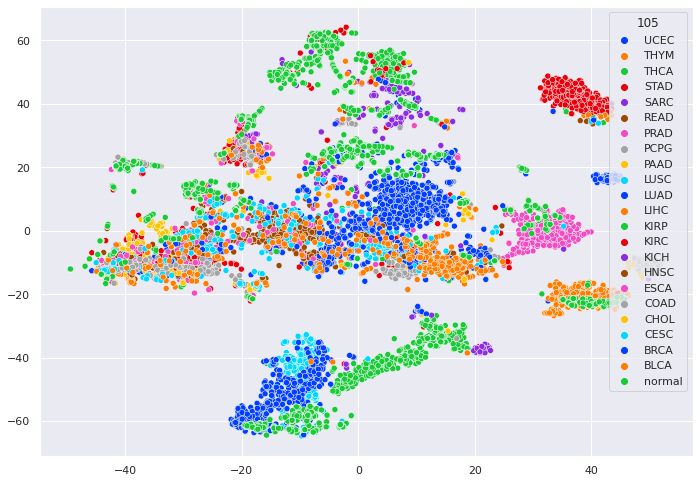

In [ ]:
import numpy as np
from sklearn.datasets import load_digits
from scipy.spatial.distance import pdist
from sklearn.manifold.t_sne import _joint_probabilities
from scipy import linalg
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import squareform
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
# colors = ["#FF0B04", "#4374B3", "#388659", "#2bd9fe",
#           "#90aa86", "#824C71", "#1E3F20", "#94ECBE",
#           "#4C5760", "#A2708A", "#C1F7DC", "#824670",
#           "#FFDF64", "#877B66", "#D4E6B5", "#7C6C77",
#           "#D1D0A3", "#FFE787", "#1F2232", "#596475",
#           "#E88D67", "#7B8CDE", "#DCF763"]# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
#palette = sns.color_palette("bright", 23)

tsne = TSNE(perplexity=100)
#X_embedded = tsne.fit_transform(X_train)
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_train, legend='full')